<a href="https://colab.research.google.com/github/alirezaght/tesseract-train-font/blob/main/tesseract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting google drive to have access to data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Create dataset

/content
/content/dataset
Copy of BBADRBD.TTF


Copy of BHOMA.TTF


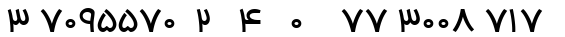

Copy of BMITRA.TTF


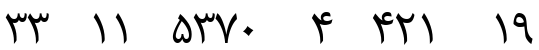

Copy of BMITRABD.TTF


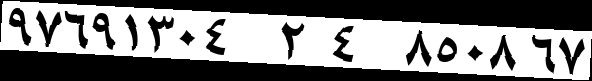

Copy of BNAZANB.TTF


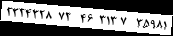

Copy of BNAZANIN.TTF


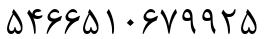

Copy of BROYA.TTF


Copy of BROYABD.TTF


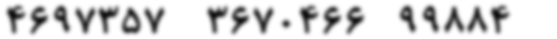

Copy of BZAR.TTF


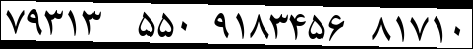

Copy of BZARBOLD.TTF


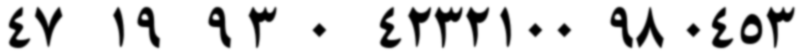

Copy of BBADR.TTF


Copy of BJALAL.TTF


Copy of BJALALBD.TTF


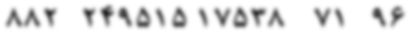

Copy of BARASH.TTF


futur.ttf


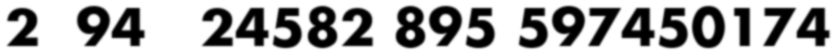

Helvetica.ttf


ariblk.ttf


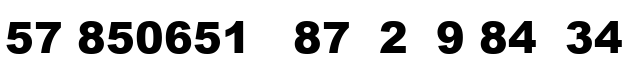

skipping cambria.ttc
calibrili.ttf


calibriz.ttf


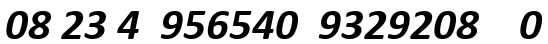

calibrib.ttf


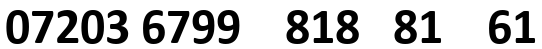

calibri.ttf


calibril.ttf


ariali.ttf


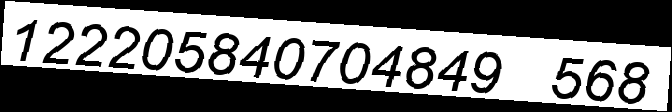

arialbd.ttf


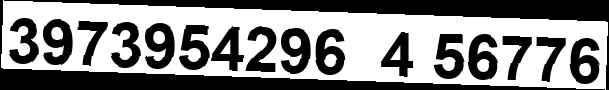

calibrii.ttf


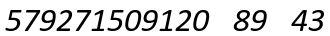

arialbi.ttf


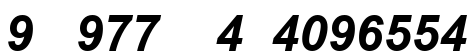

arial.ttf


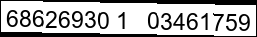

verdanaz.ttf


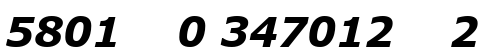

verdana.ttf


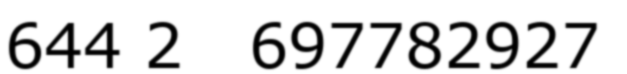

verdanab.ttf


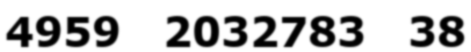

timesbi.ttf


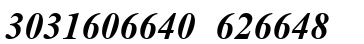

verdanai.ttf


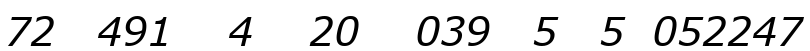

timesi.ttf


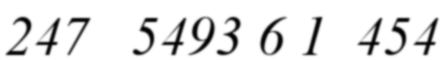

times.ttf


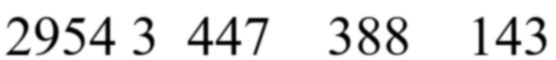

timesbd.ttf


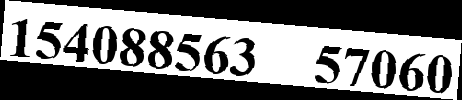

cambriai.ttf


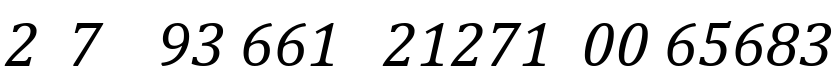

framdit.ttf


framd.ttf


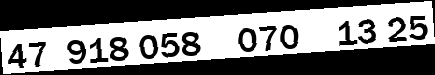

cambriaz.ttf


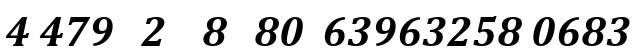

micross.ttf


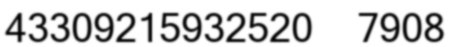

cambriab.ttf


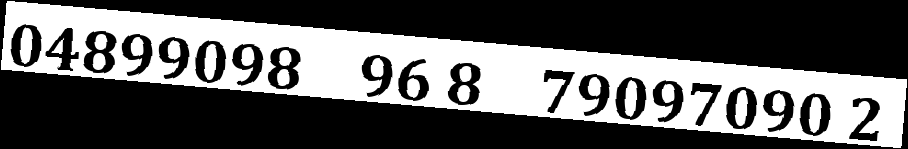

ROCKB.TTF


ROCCB___.TTF


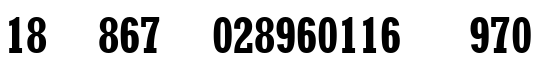

ROCK.TTF


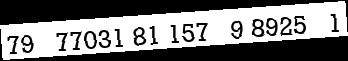

OCRAEXT.TTF


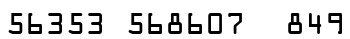

ROCKBI.TTF


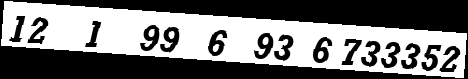

ROCKI.TTF


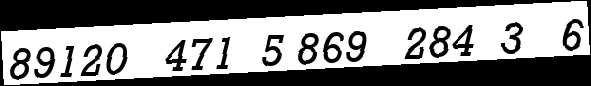

ROCKEB.TTF


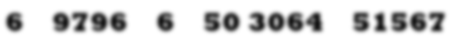

FRADMIT.TTF


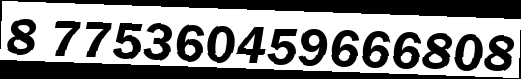

FRADMCN.TTF


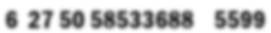

FRAHV.TTF


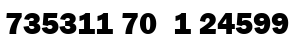

FRAMDCN.TTF


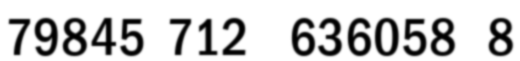

FRAHVIT.TTF


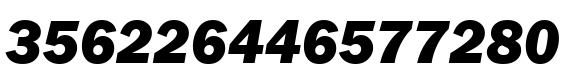

FRADM.TTF


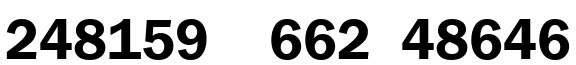

ROCC____.TTF


ARIALNBI.TTF


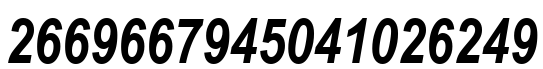

ARIALNI.TTF


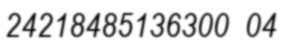

ARIALNB.TTF


ARIALN.TTF


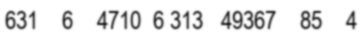

In [34]:
%cd /content
!rm -rf /content/dataset
!mkdir /content/dataset
%cd /content/dataset

from PIL import Image,ImageDraw,ImageFont,ImageFilter
from IPython.display import display
import os
import random

def create_dataset(number_for_each_font):
  FONT_DIR = '/content/drive/MyDrive/fonts'
  count = 0
  for font_file in os.listdir(f'{FONT_DIR}'):
    sample = False
    if not font_file.lower().endswith('ttf'):
      print(f'skipping {font_file}')
      continue
    for i in range(number_for_each_font):
      count += 1
      size = random.randint(12, 64)
      font = ImageFont.truetype(f"{FONT_DIR}/{font_file}", size, encoding='unic')
      length = random.randint(12, 20)
      numbers = []
      for j in range(length):
        n = str(random.randint(0, 9)) + ((" " * random.randint(0, 4)) if random.random() < 0.3 else "")
        numbers.append(n)        

      unicode_text = "".join(numbers)
      # get the line size
      text_width, text_height = font.getsize(unicode_text)

      # create a blank canvas with extra space between lines
      canvas = Image.new('RGB', (text_width + 10, text_height + 10), "white")
      
      # draw the text onto the text canvas, and use black as the text color
      draw = ImageDraw.Draw(canvas)
      draw.text((5,5), unicode_text, 'black', font)
      if random.random() < 0.3:
        canvas = canvas.rotate(random.randint(-5,5), expand = 1)

      if random.random() < 0.3 and size > 24:
        canvas = canvas.filter(ImageFilter.GaussianBlur(radius=random.randint(0,2)))
      # save the blank canvas to a file
      canvas.save(f"{count}.tif", dpi=(300, 300))
      with open(f'{count}.gt.txt', 'w') as f:
        f.write(unicode_text)
      if not sample:
        sample = True
        print(font_file)
        im = Image.open(f'{count}.tif', 'r')
        display(im)

create_dataset(1000)

# Install tesseract

First let's install tesseract + all the dependency required

In [ ]:
!apt install tesseract-ocr libtesseract-dev bc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libleptonica-dev tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  bc libleptonica-dev libtesseract-dev tesseract-ocr tesseract-ocr-eng
  tesseract-ocr-osd
0 upgraded, 6 newly installed, 0 to remove and 37 not upgraded.
Need to get 7,636 kB of archives.
After this operation, 29.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 bc amd64 1.07.1-2 [86.2 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libleptonica-dev amd64 1.75.3-3 [1,308 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libtesseract-dev amd64 4.00~git2288-10f4998a-2 [1,447 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesser

# Clone tesstrain

In [ ]:
%cd /content
!git clone https://github.com/tesseract-ocr/tesstrain

/content
Cloning into 'tesstrain'...
remote: Enumerating objects: 819, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 819 (delta 21), reused 18 (delta 9), pack-reused 775
Receiving objects: 100% (819/819), 13.37 MiB | 26.38 MiB/s, done.
Resolving deltas: 100% (463/463), done.


# Prepare data

If we want to load from google drive

In [ ]:
%cd /content
!rm -rf /content/bnk-ground-truth
!cp /content/drive/MyDrive/dataset.rar /content/
!unrar x /content/dataset.rar
!mkdir tesstrain/data
!rm -rf tesstrain/data/bnk-ground-truth
!mv bnk-ground-truth tesstrain/data/bnk-ground-truth
%cd /content/tesstrain

/content

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/dataset.rar

Creating    bnk-ground-truth                                          OK
Extracting  bnk-ground-truth/000e9444-03bb-4f7f-a07b-a7c623f8bbb6.gt.txt       0%  OK 
Extracting  bnk-ground-truth/000e9444-03bb-4f7f-a07b-a7c623f8bbb6.tif       0%  OK 
Extracting  bnk-ground-truth/0011fe2e-e8ee-48e8-9699-cc59e1d4876a.gt.txt       0%  OK 
Extracting  bnk-ground-truth/0011fe2e-e8ee-48e8-9699-cc59e1d4876a.tif       0%  OK 
Extracting  bnk-ground-truth/0033ddc4-7c75-42af-a9e7-74111ea9f938.gt.txt       0%  OK 
Extracting  bnk-ground-truth/0033ddc4-7c75-42af-a9e7-74111ea9f938.tif       0%  OK 
Extracting  bnk-ground-truth/00383b82-c116-4844-b52c-5a72f9420f7d.gt.txt       0%  OK 
Extracting  bnk-ground-truth/00383b82-c116-4844-b52c-5a72f9420f7d.tif       0%  OK 
Extracting  bnk-ground-truth/0040885a-61d2-4dc2-8d79-fe

If we want to use the datase we just created

In [35]:
%cd /content
!mkdir tesstrain/data
!rm -rf tesstrain/data/bnk-ground-truth
!mv dataset tesstrain/data/bnk-ground-truth
%cd /content/tesstrain

/content
mkdir: cannot create directory ‘tesstrain/data’: File exists
/content/tesstrain


# Train

In [ ]:
!make clean MODEL_NAME=bnk
!make training MODEL_NAME=bnk

Streaming output truncated to the last 5000 lines.
+ tesseract data/bnk-ground-truth/6707.tif data/bnk-ground-truth/6707 --psm 13 lstm.train
Tesseract Open Source OCR Engine v4.0.0-beta.1 with Leptonica
Page 1
PYTHONIOENCODING=utf-8 python3 generate_line_box.py -i "data/bnk-ground-truth/6709.tif" -t "data/bnk-ground-truth/6709.gt.txt" > "data/bnk-ground-truth/6709.box"
+ tesseract data/bnk-ground-truth/6709.tif data/bnk-ground-truth/6709 --psm 13 lstm.train
Tesseract Open Source OCR Engine v4.0.0-beta.1 with Leptonica
Page 1
PYTHONIOENCODING=utf-8 python3 generate_line_box.py -i "data/bnk-ground-truth/6710.tif" -t "data/bnk-ground-truth/6710.gt.txt" > "data/bnk-ground-truth/6710.box"
+ tesseract data/bnk-ground-truth/6710.tif data/bnk-ground-truth/6710 --psm 13 lstm.train
Tesseract Open Source OCR Engine v4.0.0-beta.1 with Leptonica
Page 1
PYTHONIOENCODING=utf-8 python3 generate_line_box.py -i "data/bnk-ground-truth/6711.tif" -t "data/bnk-ground-truth/6711.gt.txt" > "data/bnk-ground-tr

In [ ]:
!make traineddata MODEL_NAME=bnk